## 3. Exploring data tables with Pandas

1. Use Pandas to read the house prices data. How many columns and rows are there in this dataset?
2. The first step I usually do is to use commands like pandas.head() to print a few rows of data. Look around what kind of features are available and read data description.txt for more info. Try to understand as much as you can. Pick three features you think will be good predictors of house prices and explain what they are.
3. How many unique conditions are there in SaleCondition? Use Pandas to find out how many samples are labeled with each condition. What do you learn from doing this?
4. Select one variable you picked in b., do you want to know something more about that variable? Use Pandas to answer your own question and de- scribe what you did shortly here.

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [44]:
dataset = pd.read_csv('train.csv') # load training set as dataframe

In [45]:
# 3a) Find number of rows, columns
print("This dataframe has %d rows and %d columns"% dataset.shape)

This dataframe has 1460 rows and 81 columns


In [46]:
# 3b) Look around & pick 3 features
dataset.head()
picked_features = ["LotArea", "YearBuilt", "SaleCondition"]
# x1 = dataset.loc[:,"LotArea"]
# x2 = dataset.loc[:,"YearBuilt"]
# x3 = dataset.loc[:,"SaleCondition"]

In [47]:
# 3c) How many type of Sale Condition
n = dataset['SaleCondition'].nunique()
print("There %d unique conditions in SaleCondition."%(n))
print(dataset['SaleCondition'].value_counts())

There 6 unique conditions in SaleCondition.
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64


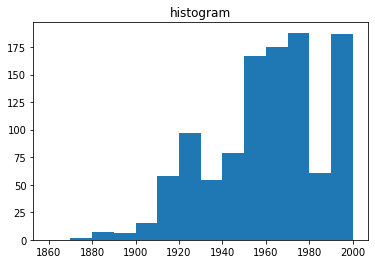

In [48]:
# 3d) Select one variable from 3b) & visualize something
# เลือกมา 3 features -> LotArea, YearBuilt, SaleCondition (เหตุผล: คิดว่าน่าจะเกี่ยวข้องกับราคามากที่สุด)
print(dataset['YearBuilt'].value_counts())

plt.hist(dataset['YearBuilt'], bins = np.arange(1860, 2010, 10))
plt.title("histogram")
plt.show()

## 4. Learning to explore data with Seaborn

1. Let us first look at the variable we want to predict SalePrice. Use Seaborn to plot histogram of sale prices. What do you notice in the histogram?
2. Plot the histogram of the LotArea variable. What do you notice in the histogram?
3. Use Seaborn to plot LotArea in the x-axis and SalePrice on the y-axis. Try plotting log(LotArea) versus log(SalePrice) and see if the plot looks better.

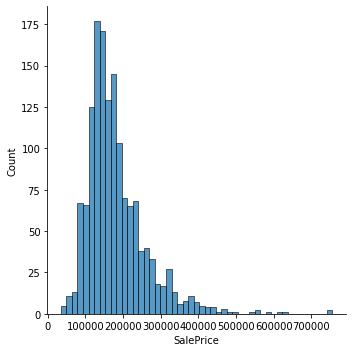

In [49]:
# 4a) Look at dependence variable "SalePrice"
sns.displot(dataset, x="SalePrice") # Plot histogram of "SalePrice"

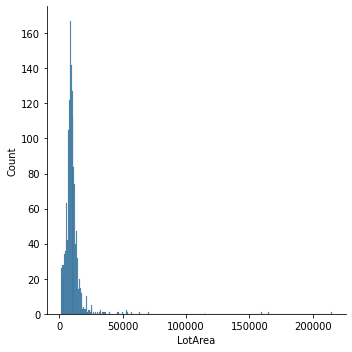

In [50]:
# 4b) Plot histogram of "LotArea" variable
sns.displot(dataset, x="LotArea") # Plot histogram of "LotArea"

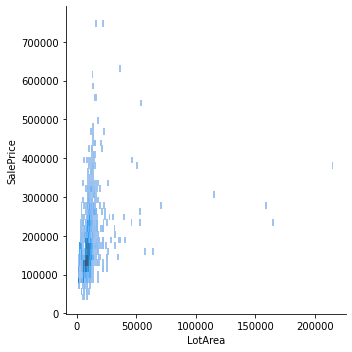

In [51]:
# 4c) Plot LotArea in X-axis, SalePrice in Y-Axis
sns.displot(dataset, x="LotArea", y="SalePrice")

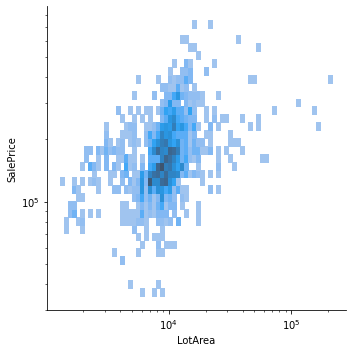

In [52]:
# 4d) Plot LotArea in X-axis, SalePrice in Y-Axis in log scale
sns.displot(dataset, x="LotArea", y="SalePrice", log_scale=True)

## 5. Dealing with missing values

1. Suppose we want to start the first step of house price modeling by exploring the relationship between four variables: MSSubClass, LotArea, LotFrontage and SalePrice. I have done some exploring and found out that LotFrontage has a lot of missing values, so you need to fix it.
2. LotFrontage is the width of the front side of the property. Use Pandas to find out how many of the houses in our database is missing LotFrontage value.
3. Use Pandas to replace NaN values with another number. Since we are just exploring and not modeling yet, you can simply replace NaN with zeros for now.

In [53]:
# 5a) LotFrontage หายไปกี่ตัว
n_missing = dataset['LotFrontage'].isna().sum()
print("There are %d missing cells in column LotFrontage."%(n_missing))

There are 259 missing cells in column LotFrontage.


In [54]:
# 5b) แทนที่ Nan ด้วย 0 ไปก่อน
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value=0) # ['mean', 'median', 'most_frequent', 'constant']
dataset['LotFrontage'] = imputer.fit_transform(np.asarray(dataset['LotFrontage']).reshape(-1, 1))
n_missing = dataset['LotFrontage'].isna().sum()
print("There are %d missing cells in column LotFrontage."%(n_missing))

There are 0 missing cells in column LotFrontage.


## 6. Correlations between multiple variables

One incredible feature of Seaborn is the ability to create correlation grid with pairplot function. We want to create one single plot that show us how all variables are correlated.
1. First, you need to create a data table with four columns: MSSubClass, LotArea (with log function applied), LotFrontage (missing values replaced) and SalePrice (with log function applied).
2. Then, use pairplot to create a grid of correlation plots. What do you observe from this plot?

In [55]:
# 6a) Create table with four columns: MSSubClass, log(LotArea), log(LotFrontage), log(SalePrice)
dataset['LotAreaLog2'] = np.log2(dataset['LotArea'])
dataset['SalePriceLog2'] = np.log2(dataset['SalePrice'])

new_dataframe = dataset[['MSSubClass', 'LotAreaLog2', 'LotFrontage', 'SalePriceLog2']].copy()
# new_dataframe = dataset.filter(['MSSubClass', 'LotAreaLog2', 'LotFrontageLog2', 'SalePrice'], axis=1) # Alternative way

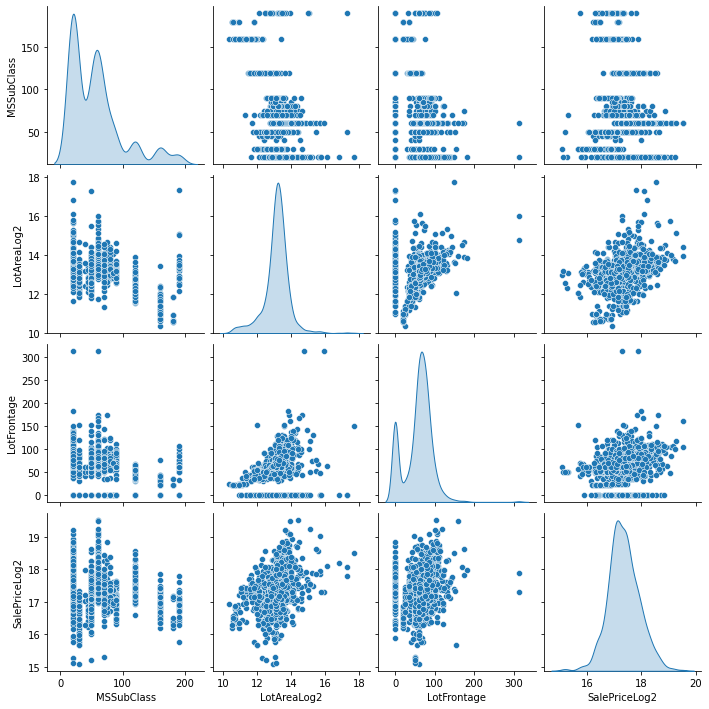

In [56]:
#6b) Use pairplot to create grid of coorelation plots
sns.pairplot(new_dataframe, diag_kind='kde')

## 7. Data Preparation

Let's prepare train.csv for model training

1. Pick columns that are numeric data and plot distributions of those data (with Seaborn). If you find a column with skewed distribution you will write a script to transform that column with a log function. Then standardize them.
2. For categorical variables, we will simply transform categorical data into numeric data by using function `pandas.get dummies()`.
3. Split data into x and y. The variable x contains all the house features except the SalePrice. y contains only the SalePrice.

In [57]:
from scipy.stats import skew
# 7) Get rid of negative, zero values
def shift_negative(X): return X-(min(X)-1)

In [58]:
# 7a) read training data using pandas.read_csv()
dataset = pd.read_csv('train.csv') # load training set
new_dataframe = pd.DataFrame().reindex_like(dataset)
new_dataframe.pop('SalePrice')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1455   NaN
1456   NaN
1457   NaN
1458   NaN
1459   NaN
Name: SalePrice, Length: 1460, dtype: float64

/home/teera/.virtualenvs/cv/lib/python3.6/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


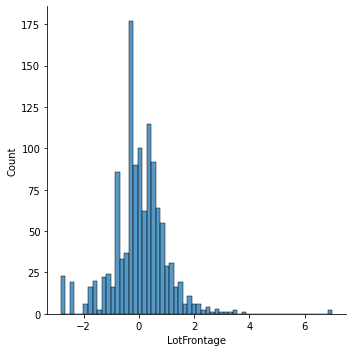

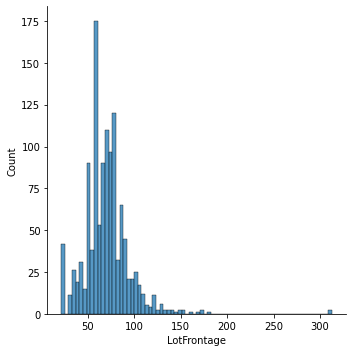

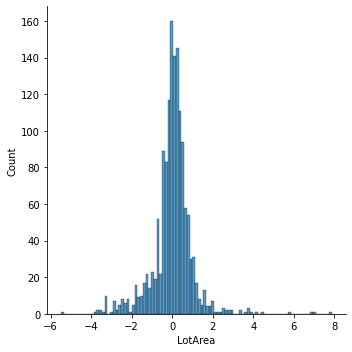

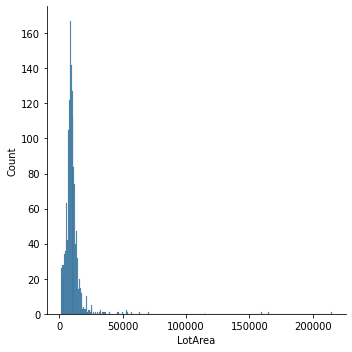

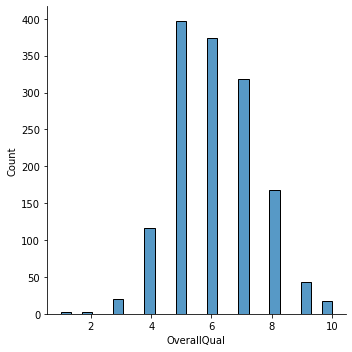

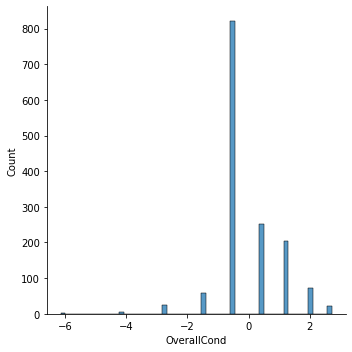

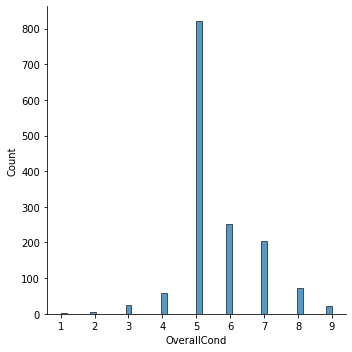

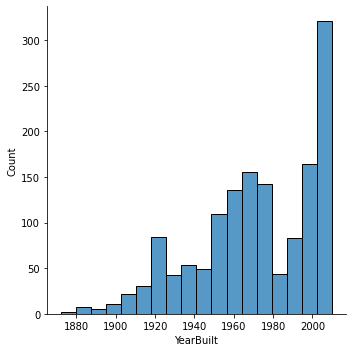

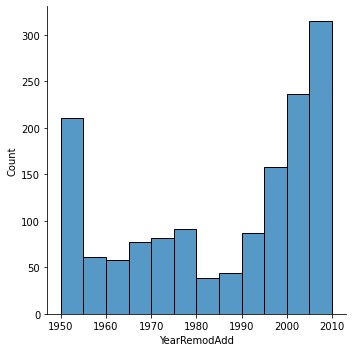

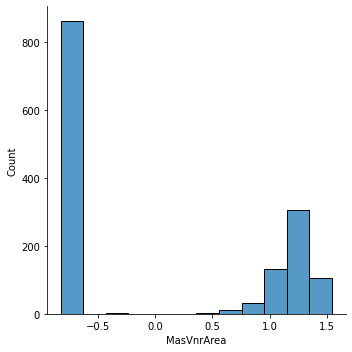

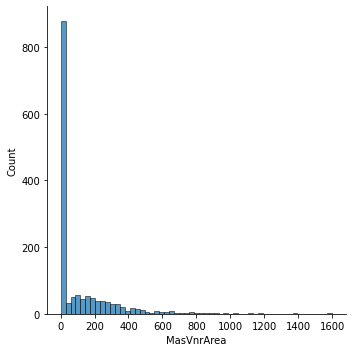

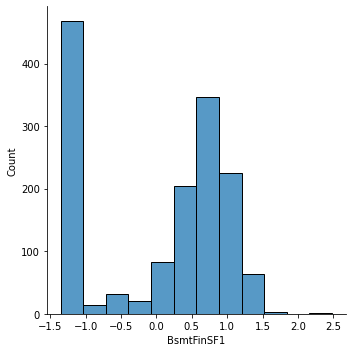

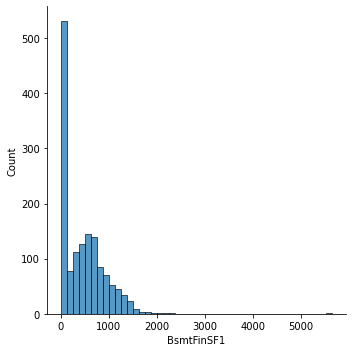

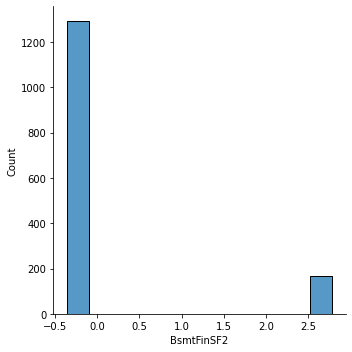

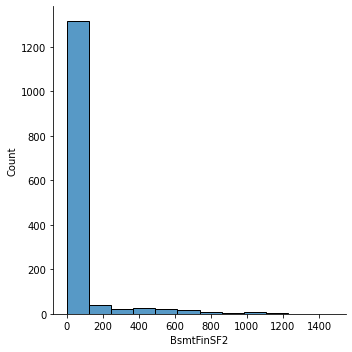

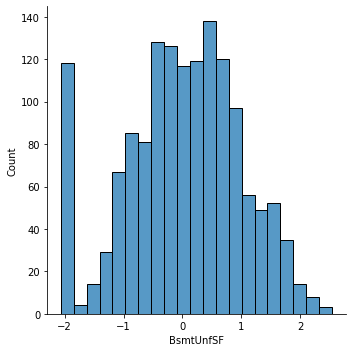

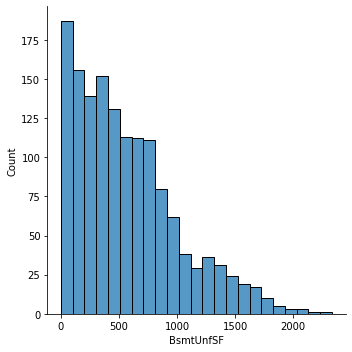

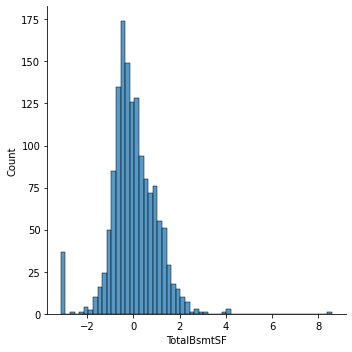

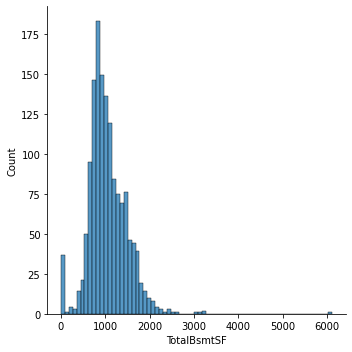

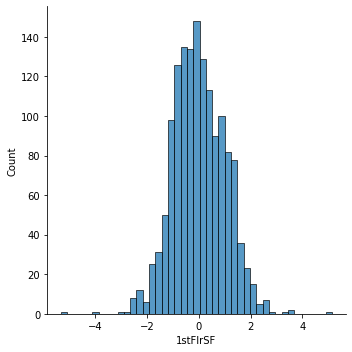

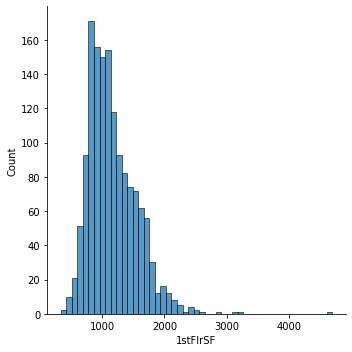

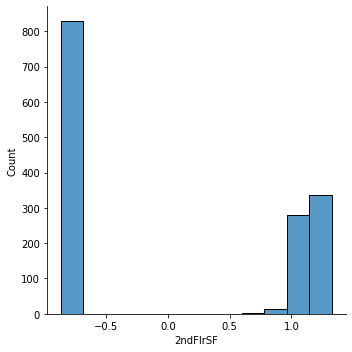

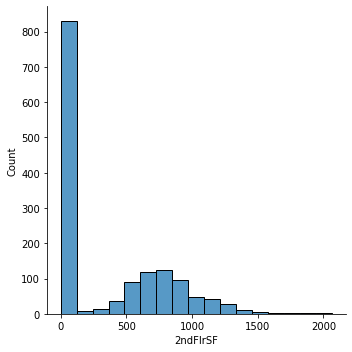

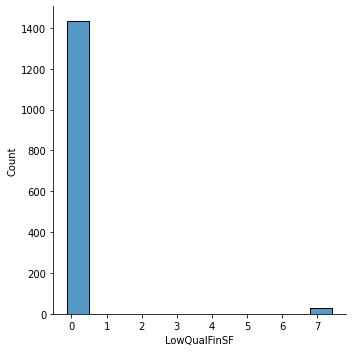

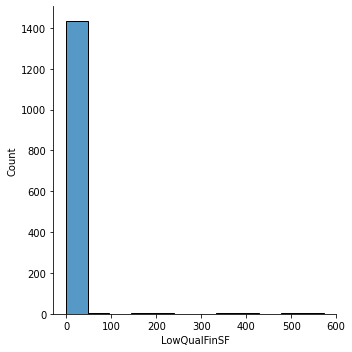

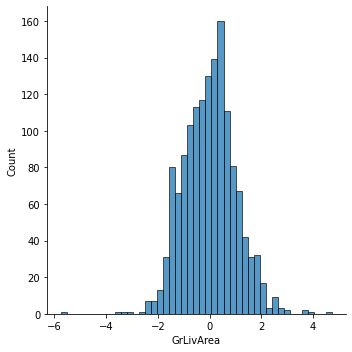

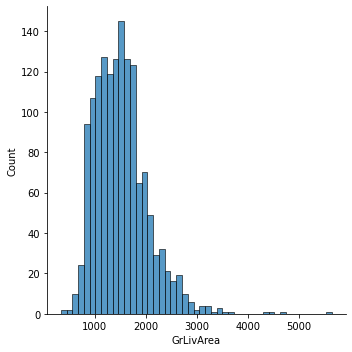

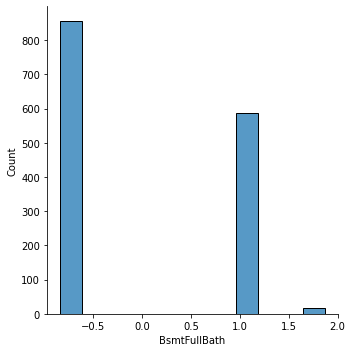

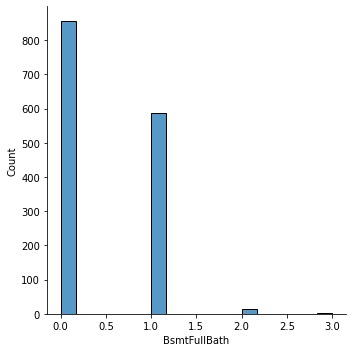

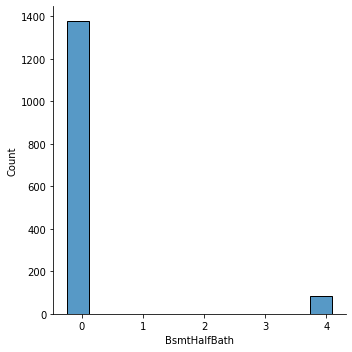

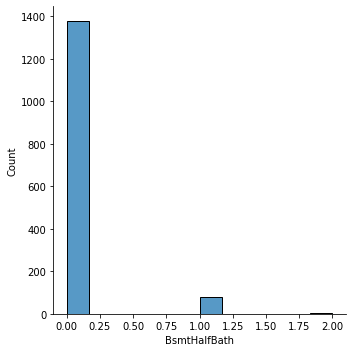

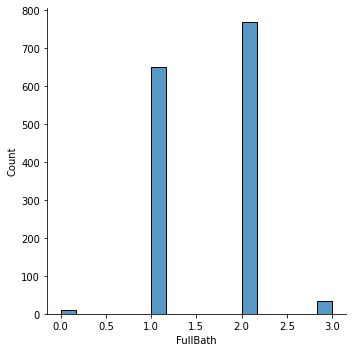

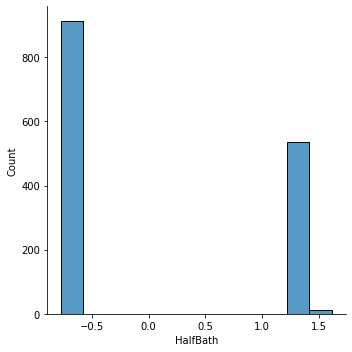

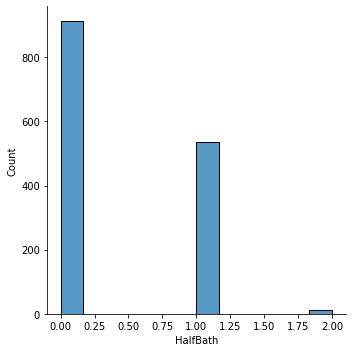

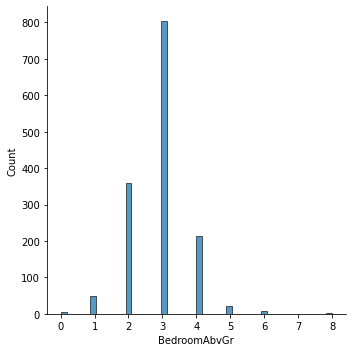

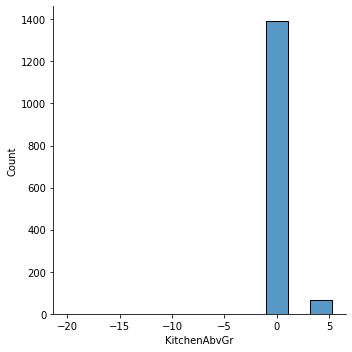

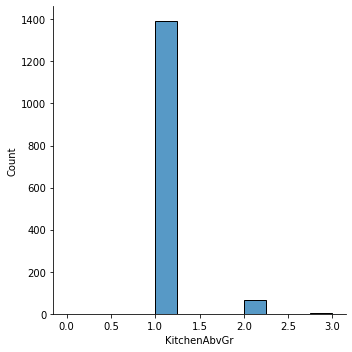

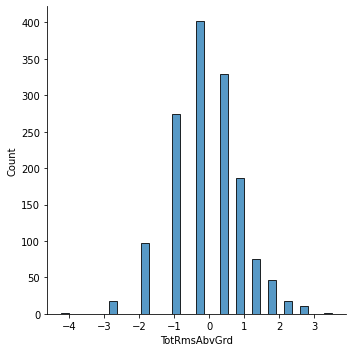

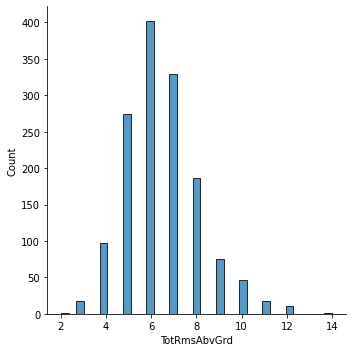

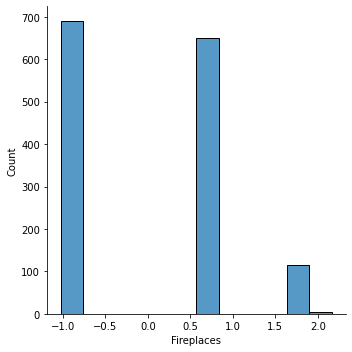

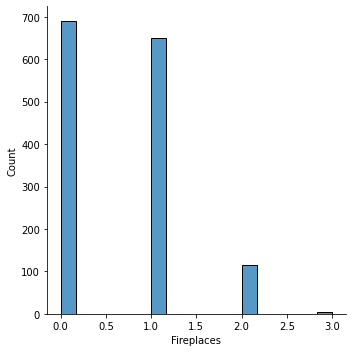

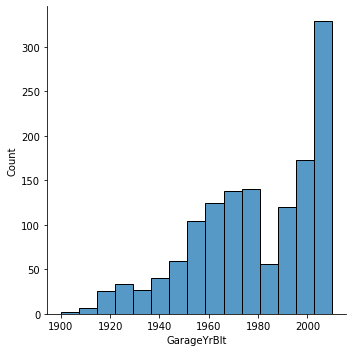

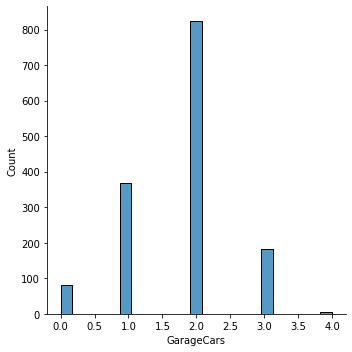

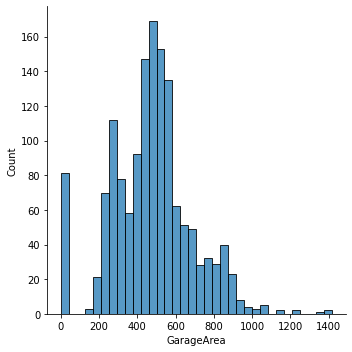

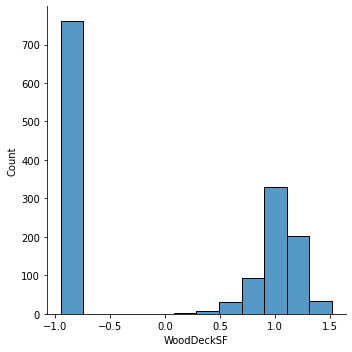

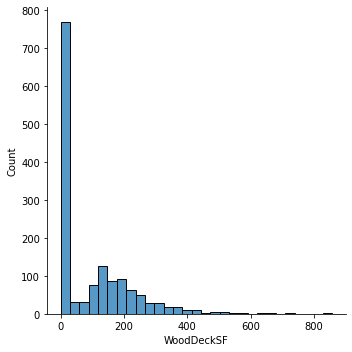

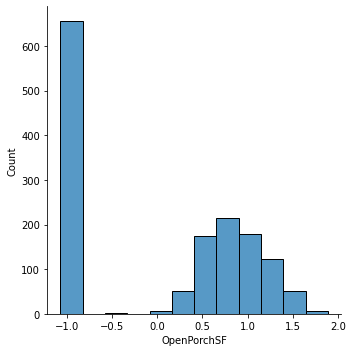

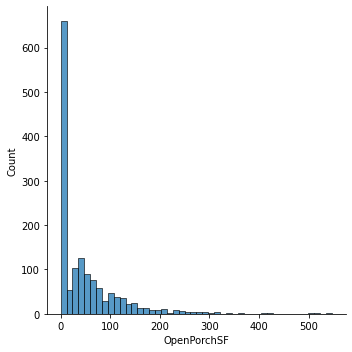

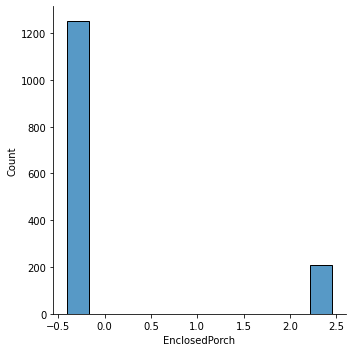

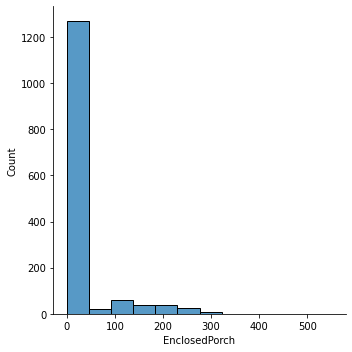

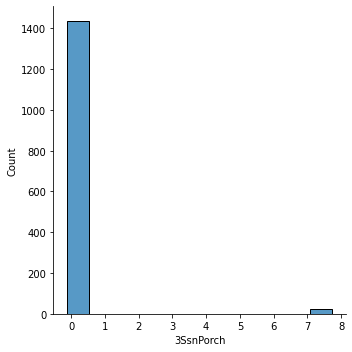

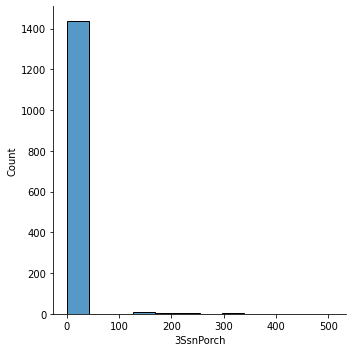

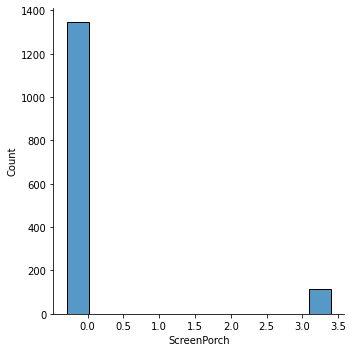

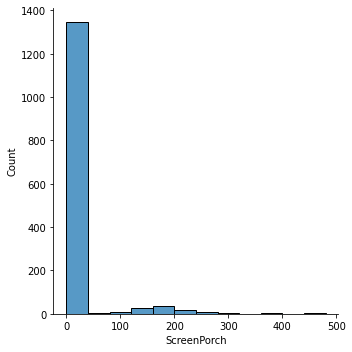

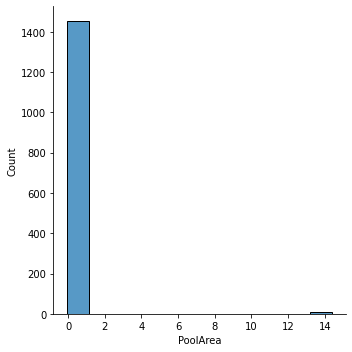

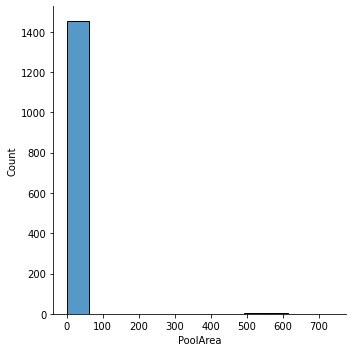

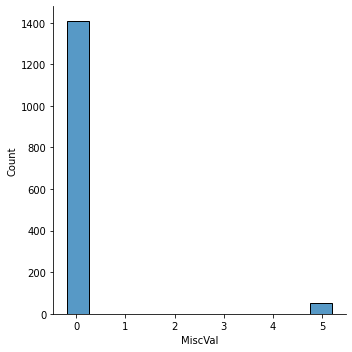

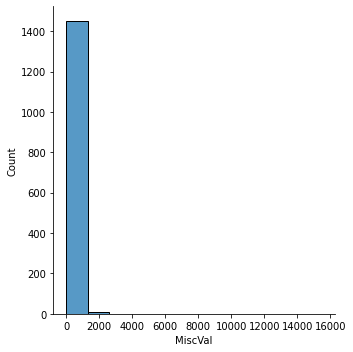

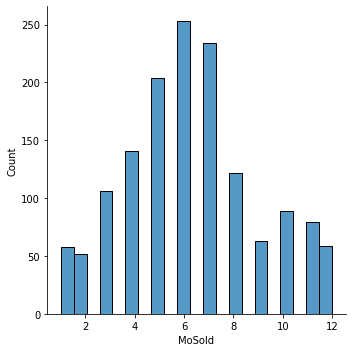

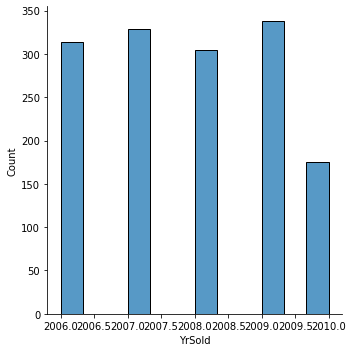

In [59]:
# 7b) Pick numerical columns & transform with log() or boxcox() to standardize them
# เท่าที่ดูใน data_description.txt มี columns ที่ใช้ตัวเลขในการระบุแต่จริง ๆ แล้วเป็น categorical data จึงไม่สามารถใช้ dataset.._get_numeric_data().columns ได้ ผมจึงจัดด้วยมือแทน

numerical_features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea' ,'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
categorical_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
PT_list = {}
SS_list = {}
for feature in numerical_features:
    # sns.displot(dataset, x=feature) # Plot original
    if skew(dataset[feature] , nan_policy = "omit") > 0.3:
        pt = preprocessing.PowerTransformer(method='box-cox', standardize=True) # Boxcox
        PT_list[feature]= pt
        new_dataframe[feature] = pt.fit_transform(np.asarray(shift_negative(dataset[feature])).reshape(-1, 1))
        sns.displot(new_dataframe[feature]) # Plot after shift to positive and applied boxcox
    else:
        scaler = preprocessing.StandardScaler()
        new_dataframe[feature] = scaler.fit_transform(np.asarray(shift_negative(dataset[feature])).reshape(-1, 1))
        SS_list[feature] = scaler
    sns.displot(dataset[feature]) # Plot after standartized

In [60]:
# 7c) Perform one-hot encoding on categorical features
new_dataframe.pop('Id')
for feature in categorical_features:
    # n = dataset[feature].nunique()
    # if n==2: #Avoiding Dummy Variable Trap for 2 categories (When using multiple Linear Regression)
    #     onehot = pd.get_dummies(dataset[feature], dummy_na=True, prefix=feature, prefix_sep='-').iloc[:, 0]
    # else:
    #     onehot = pd.get_dummies(dataset[feature], dummy_na=True, prefix=feature, prefix_sep='-') # Act as missing data is another categories
    onehot = pd.get_dummies(dataset[feature], dummy_na=True, prefix=feature, prefix_sep='-') # Act as missing data is another categories เพราะบางอันที่เป็น ์Nan คืออันที่ไม่มี เช่น สระว่ายนำ้
    new_dataframe.pop(feature) #Remove original column
    new_dataframe = pd.concat([new_dataframe, onehot], axis=1)
    # dataset.merge(onehot, left_on=feature) # Insert next to original column
    # dataset.drop(feature,axis = 1) # remove old categorical column

In [61]:
# 7d) Fill nNan with mean of that column
new_dataframe = new_dataframe.fillna(new_dataframe.mean())

In [62]:
# 7e) Split independent & dependent variables
y_train = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())
X_train = new_dataframe

## 8. Let us first fit a very simple linear regression model, just to see what we get.

1. Use import LinearRegression from sklearn.linear model and use function `fit()` to fit the model.
2. Use function `predict()` to get house price predictions from the model (let’s call the predicted house prices yhat).
3. Plot `y` against `yhat` to see how good your predictions are.

In [63]:
# 8a) Import & Fit
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [64]:
# 8b) Predict
yhat = pd.DataFrame(regressor.predict(X_train))
yhat.columns = ['Predicted'] # Rename predicted column

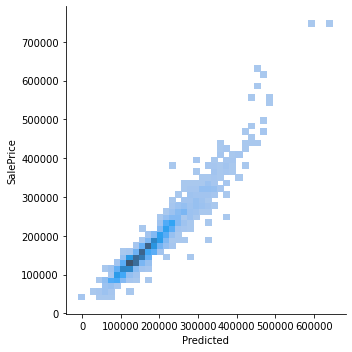

In [65]:
# 8c) Plot y(real) against yhat
concatned = pd.concat([y_train, yhat], axis=1)
sns.displot(concatned, x='Predicted', y='SalePrice')

## 9. Assessing Your Model

According to Kaggle’s official rule on this problem, they use root mean square errors (rmse) to judge the accuracy of our model. This error computes the dif- ference between the log of actual house prices and the log of predicted house price. Find the mean and squareroot them.

We want to see how we compare to other machine learning contestants on Kag- gle so let us compute our rmse. Luckily, sklearn has done most of the work for you by providing mean square error function. You can use it by importing the function from sklearn.metrics. Then, you can compute mean square error and take a squareroot to get rmse.

What’s the rmse of your current model? Check out Kaggle Leaderboard for this problem to see how your number measures up with the other contestants.

In [66]:
# 9a) Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_train, yhat, squared=False)
print("Got RMSE(Root Mean Square Errors) = %f"%(rmse))
mse = mean_squared_error(y_train, yhat)
print("Got MSE(Mean Square Errors) = %f"%(mse))


Got RMSE(Root Mean Square Errors) = 21792.171285
Got MSE(Mean Square Errors) = 474898729.321918


## 10. Cross Validation

As we discussed earlier, don’t brag about your model’s accuracy until you have performed cross validation. Let us check cross-validated performance to avoid embarrassment.

Luckily, scikit learn has done most of the work for us once again. You can use the function `cross_val_predict()` to train the model with cross validation method and output the predictions.

What’s the rmse of your cross-validated model? Discuss what you observe in your results here. You may try plotting this new yhat with y to get better insights about this question.

/home/teera/.virtualenvs/cv/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Got RMSE(Root Mean Square Errors) = 211064251192948.687500
Got MSE(Mean Square Errors) = 44548118131640137560384077824.000000


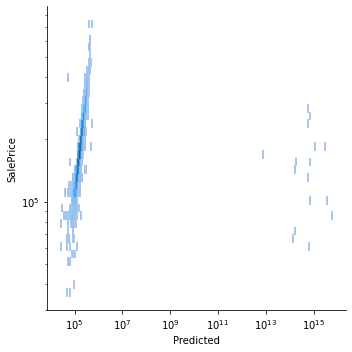

In [67]:
from sklearn.model_selection import cross_val_predict
yhat = pd.DataFrame(cross_val_predict(regressor, X_train, y_train, cv=10))
yhat.columns = ['Predicted'] # Rename predicted column
concatned = pd.concat([y_train, yhat], axis=1)
sns.displot(concatned, x='Predicted', y='SalePrice', log_scale=True)
rmse = mean_squared_error(y_train, yhat, squared=False)
print("Got RMSE(Root Mean Square Errors) = %f"%(rmse))
mse = mean_squared_error(y_train, yhat)
print("Got MSE(Mean Square Errors) = %f"%(mse))

เนื่องจากมี Predicted Data ที่มีค่าสูงมากโผล่มา ทำให้ RMSE มีค่าสูงมากตามไปด้วยแม้ข้อมูลส่วนใหญ่จะสามารถ predict ได้ใกล้เคียง

## 11 (Optional) Fit Better Models
There are other models you can fit that will perform better than linear regres- sion. For example, you can fit linear regression with L2 regularization. This class of models has a street name of ‘Ridge Regression’ and sklearn simply called them Ridge. As we learned last time, this model will fight overfitting problem. Furthermore, you can try linear regression with L1 regularization (street name Lasso Regression or Lasso in sklearn). Try these models and see how you com- pare with other Kagglers now. You can write about your findings below.